In [2]:
import warnings

import torch
from torch import nn
from torch.utils.data import DataLoader

import numpy as np

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Compose, Resize, Normalize
from torchvision.transforms.functional import to_pil_image

from models import Generator, Discriminator
from config import Config
from train import train_model
from utils import weight_init

import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")

# Data overview

In [44]:
dataset = ImageFolder('data/', Compose([Resize((128, 128)), ToTensor(), Normalize((0.6805, 0.5742, 0.5860), (0.2019, 0.2034, 0.1868))]))

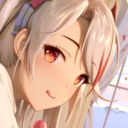

In [43]:
#to_pil_image(dataset[randint(0, len(dataset)-1)][0])

In [5]:
len(dataset)

2434

In [3]:
cfg = Config()

In [7]:
dataloader = DataLoader(dataset, cfg.batch_size, shuffle=True, drop_last=True)

# Models training

In [13]:
g = Generator(cfg).to(cfg.device)
g.apply(weight_init)

Generator(
  (attn1): Self_Attn(
    (f_conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (g_conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (sm): Softmax(dim=-1)
  )
  (attn2): Self_Attn(
    (f_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (g_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (sm): Softmax(dim=-1)
  )
  (l1): Sequential(
    (0): SpectralNorm(
      (module): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(2, 2), bias=False)
    )
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (l2): Sequential(
    (0): SpectralNorm(
      (module): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Dropout(p=0.3, inplace=False)
  )
  (l3): Sequenti

In [9]:
d = Discriminator(cfg).to(cfg.device)
d.apply(weight_init)


Discriminator(
  (attn1): Self_Attn(
    (f_conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (g_conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (sm): Softmax(dim=-1)
  )
  (attn2): Self_Attn(
    (f_conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (g_conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (sm): Softmax(dim=-1)
  )
  (mb_discr): MinibatchDiscrimination()
  (l1): Sequential(
    (0): SpectralNorm(
      (module): Conv2d(3, 64, kernel_size=(4, 4), stride=(4, 4), padding=(1, 1), bias=False)
    )
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): SpectralNorm(
      (module): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    )
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Dropout(p=0.3, inplace=False)
  )
  (l2): Sequential(
    (0): SpectralNorm(
      (module): Conv2d(128, 2

In [10]:
g_opt = torch.optim.Adam(g.parameters(), lr=cfg.lr, betas=(cfg.beta1, 0.999))
d_opt = torch.optim.Adam(d.parameters(), lr=cfg.lr, betas=(cfg.beta1, 0.999))

criterion =  nn.BCELoss()

In [11]:
results = train_model(g, d, d_opt, g_opt, criterion, cfg.epochs, dataloader, cfg)

In [ ]:
t = np.load('data.npy', allow_pickle=True)

In [67]:
k = 10
g_l = t.item()["G_loss"][::k]
d_l = t.item()["D_loss"][::k]

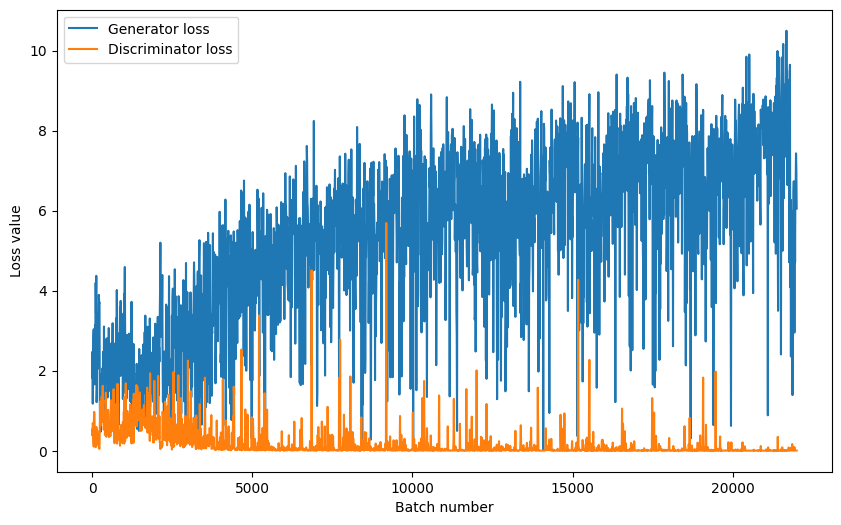

In [71]:
plt.figure(figsize=(10, 6))
plt.xlabel("Batch number")
plt.ylabel("Loss value")
plt.plot(list(range(1, 22001))[::k], g_l, label='Generator loss')
plt.plot(list(range(1, 22001))[::k], d_l, label='Discriminator loss')
plt.legend()

22000